In [39]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define parameters
batch_size = 30
img_height = 224
img_width = 224
dataset_path = '/home/ansh/Jupyter/Dog_breed/dataset'


In [3]:
# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # Split 20% of data as validation set
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 967 files belonging to 10 classes.
Using 774 files for training.


In [4]:
# Defining labels
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['Beagle', 'Boxer', 'Bulldog', 'Dachshund', 'German_Shepherd', 'Golden_Retriever', 'Labrador_Retriever', 'Poodle', 'Rottweiler', 'Yorkshire_Terrier']


In [5]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 967 files belonging to 10 classes.
Using 193 files for validation.


In [6]:
def display_images(dataset, class_names=class_names, num_images=15):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

2024-07-16 17:24:40.312522: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


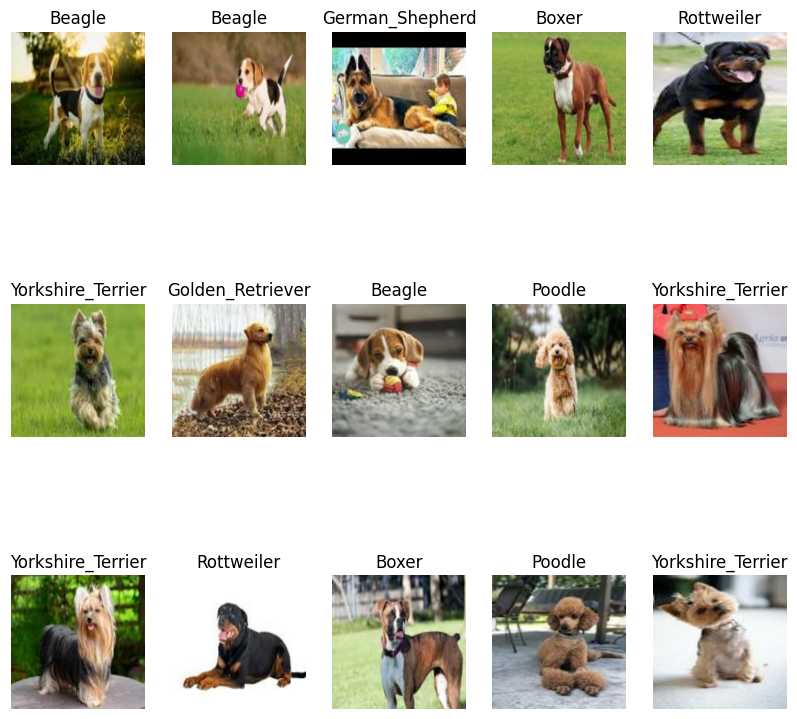

In [7]:
display_images(train_ds)

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# Define the model architecture
from tensorflow.keras import models,layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/home/ansh/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5


2024-07-16 17:24:43.274899: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 189250560 exceeds 10% of free system memory.
2024-07-16 17:24:45.296595: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 91246080 exceeds 10% of free system memory.
2024-07-16 17:24:49.759849: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 91246080 exceeds 10% of free system memory.
2024-07-16 17:24:50.107355: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 94625280 exceeds 10% of free system memory.
2024-07-16 17:24:50.107549: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 189250560 exceeds 10% of free system memory.


26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2311 - loss: 260.7857 - val_accuracy: 0.8653 - val_loss: 0.5187
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9304 - loss: 0.3006 - val_accuracy: 0.9741 - val_loss: 0.1392
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9938 - loss: 0.0515 - val_accuracy: 0.9845 - val_loss: 0.0700
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9925 - loss: 0.0301 - val_accuracy: 0.9948 - val_loss: 0.0913
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9968 - loss: 0.0363 - val_accuracy: 0.9896 - val_loss: 0.1565


In [11]:
# Evaluate the model
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.9874 - loss: 0.1962
Validation accuracy: 0.99


In [15]:
predicted = model.predict(val_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step


In [21]:
np.argmax(predicted[1])

0

In [22]:
class_names[0]

'Beagle'

2024-07-16 17:30:24.026451: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


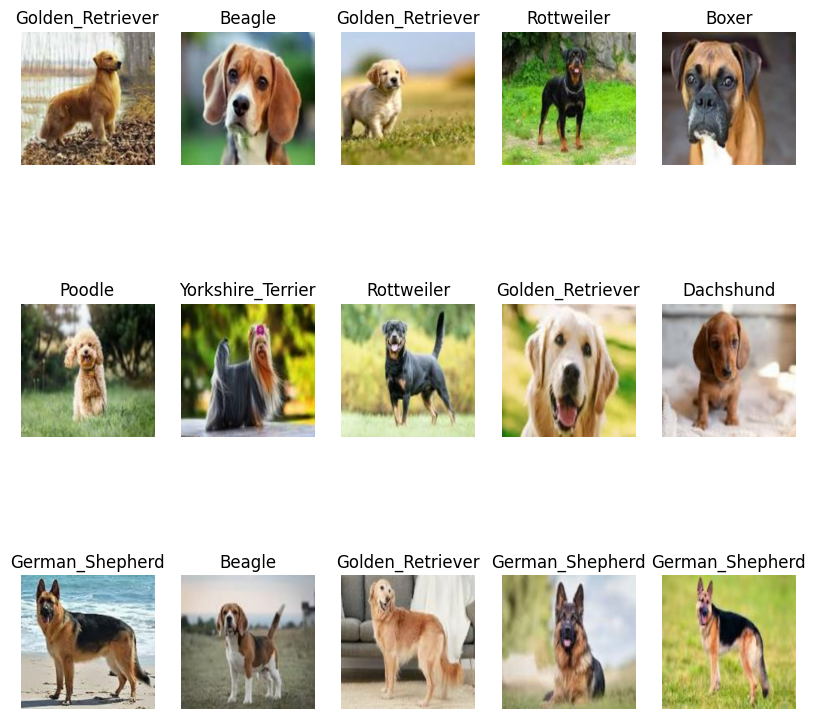

In [19]:
display_images(val_ds)

In [40]:
def check_prediction(img_path, model, class_names):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make a prediction
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_label = class_names[np.argmax(score)]

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label} ({100 * np.max(score):.2f}%)")
    plt.axis("off")
    plt.show()
    

In [48]:
path = 'dataset/Dachshund/Dachshund_9.jpg'
img_path = os.path.join(os.getcwd(), path)

print(full_path)


/home/ansh/Jupyter/Dog_breed/dataset/Dachshund/Dachshund_1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


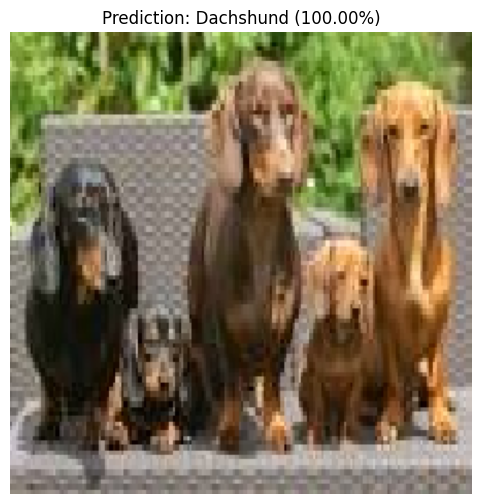

In [49]:
check_prediction(img_path, model, class_names)

In [45]:
model.save("Dog_breed_classification_model.keras")